# Кейс по моделированию

Данная домашняя работа выполняется в формате отчета (написание кода + свои размышления). Оценивается как правильность выполнения домашней работы (код), так и правильность объяснения действий и результатов. Data Scientist должен понимать, что он делает и почему он это делает. Также приходится объяснять свои размышления и принимаемое решение руководителю или человеку со стороны бизнеса.

Старайтесь выполнить домашку САМОСТОЯТЕЛЬНО. Это идет вам на пользу (Хорошая оценка - меньшее, что можно получить, главное - знания по результатам выполнения). Если что-то не получается, обращайтесь к преподавателю с вопросами.

Всего 23 балла. 10 из 10 - это 20 баллов. Лучше решить по максимуму с запасом.

Начнём!

### Данные

В задачах кредитного скоринга, предсказания дефолта самым важным признаком служит заработная плата клиента. Но... Не всегда она известна.

Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий, превысит ли средний заработок человека порог $50k

#### Как оценить качество алгоритма

Мы будем смотреть на показатель Area Under ROC Curve (ROC_AUC). Напомню, что он тем выше, чем мы правильнее упорядочиваем наши предсказанные "вероятности". Подробнее [здесь](https://ru.wikipedia.org/wiki/ROC-кривая)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Делаем важные импорты

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Данные

1) age (Возраст): continuous. 

2) workclass (Информация о работе): Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

3) fnlwgt (Вещественный признак - анонимен): continuous. 

4) education (Образование): Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

5) education-num: continuous. 

6) marital-status (Семейное положение): Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

7) occupation (Род деятельности): Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

8) relationship (Статус в семье): Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

9) race (Раса): White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

10) sex (Пол): Female, Male. 

11) capital-gain (Размер капитала): continuous. 

12) capital-loss (Фича на основе капитала): continuous. 

13) hours-per-week (Сколько часов в неделю работает): continuous.

14) >50K,<=50K (Ваш таргет)

#### Скачиваем данные

In [49]:
# В данной таблице NaNы заполнены значком '?' - заменим его на проспуски с помощью параметра "na_values"
df = pd.read_csv("/content/drive/MyDrive/HW_ML_04-05_data.adult.csv", na_values='?')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K


































### 1. Анализ

Иногда в данных встречаются пропуски.

Более подробно о работе с пропусками в Pandas можно прочитать [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) 

**(1 балл)** 
- Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

- Проведите анализ (количество строк, количество строк после удаления (use df.shape),...)

In [50]:
df = df.dropna()

In [51]:
print(df.isna().sum())
print('\n', df.shape)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
>50K,<=50K        0
dtype: int64

 (15347, 14)


**(1 балл)** 
- Выделите целевую переменную (наш таргет) в отдельную переменную (назовите ее 'target')
- Преобразуйте к бинарному формату ({0,1})
- Удалите из датасета старую переменную.
- Посмотрите распределение целевой переменной

In [52]:
df['target'] = df['>50K,<=50K'].map(lambda x: 0 if x == '<=50K' else 1)
df = df.drop(columns = ['>50K,<=50K'],axis = 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,target
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,0
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,0
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,0
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,0
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,1


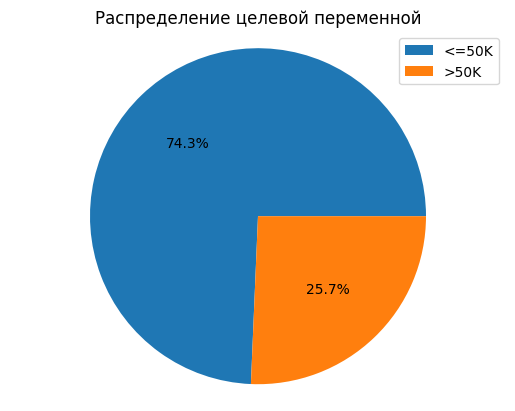

In [53]:
vals = df['target'].value_counts()
labels = ['<=50K', '>50K']
fig, ax = plt.subplots()
ax.pie(vals, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Распределение целевой переменной')
plt.legend(labels)
plt.show()

**(1 балл)**
- Постройте гистограмму распределения признака "capital-gain" с количеством бинов=50
- Посмотрите процентное соотношение категорий в колонке "workclass"

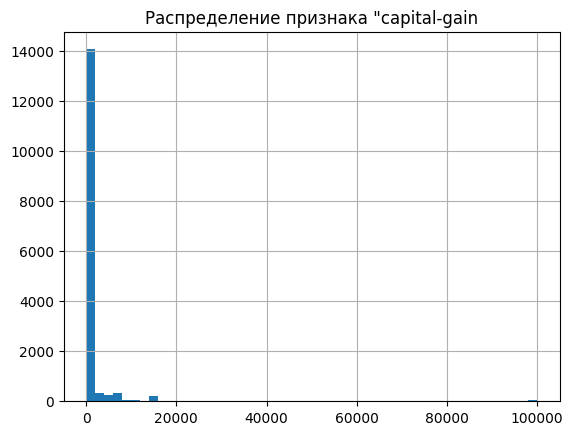

In [54]:
df['capital-gain'].hist(bins=50)
plt.title('Распределение признака "capital-gain')
plt.show()

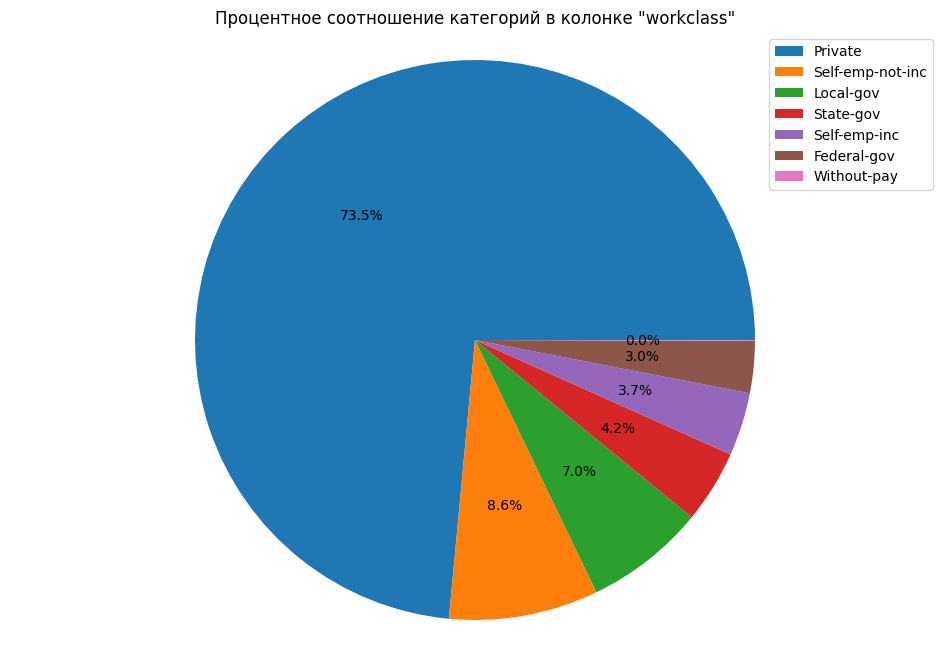

In [55]:
vals = df['workclass'].value_counts()
labels = ['Private', 'Self-emp-not-inc','Local-gov','State-gov','Self-emp-inc','Federal-gov','Without-pay']
fig, ax = plt.subplots(figsize=(12,8))
ax.pie(vals, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Процентное соотношение категорий в колонке "workclass"')
plt.legend(labels)
plt.show()

### 2. Категориальные признаки

Как вы могли заметить, среди признаков есть категориальные.

**(1 балл)**
- Выделите 3 переменные (cat - список категориальных признаков, num - список вещественных признаков, target - таргет (строка));
- Закодируйте категориальные признаки;
- Выберите признаки для обучения.

Чтобы понять, какие признаки категориальные, используйте:
- df.dtypes,
- df\[col\].value_counts,
- df\[col\].nunique
- ...

In [56]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
target             int64
dtype: object

In [57]:
# Выделяем переменные
cat = df.iloc[:, np.where(df.dtypes == 'object')[0]]
num = df.iloc[:, np.where(df.dtypes == 'int64')[0]]
num.drop(columns=num.columns[-1], axis= 1)
target = df['target']

In [58]:
# Кодируем признаки
cat_cod = pd.get_dummies(cat, dtype=int)
cat_cod.head(3)

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


## Выбор признаков для обучения

In [59]:
print(df['capital-loss'].value_counts())
print('\n', df['capital-gain'].value_counts())

0       14618
1902      108
1887       81
1977       79
2415       27
        ...  
323         1
1648        1
1411        1
974         1
653         1
Name: capital-loss, Length: 81, dtype: int64

 0        14019
15024      178
7688       144
7298       134
99999       66
         ...  
6360         1
11678        1
3887         1
1173         1
401          1
Name: capital-gain, Length: 105, dtype: int64


Заметим, что признаки 'capital-gain' и 'capital-loss' - несбалансированы. Почти все значения равняются нулю. Эти признаки можно не учитывать в обучении.

Признаки 'relationship' и 'marital-status' описывают похожие характеристики человека. Оставим второй из них - в нем категории не привязаны к полу (исключим мультиколлинеарность).

In [60]:
print('Процент мужчин с ЗП более 50 000$:',round(len(df[(df['sex']=='Male') & (df['target']==1)])/len(df[df['sex']=='Male'])*100,2),'%')
print('Процент мужчин с ЗП менее 50 000$:',round(len(df[(df['sex']=='Male') & (df['target']==0)])/len(df[df['sex']=='Male'])*100,2),'%\n')

print('Процент женщин с ЗП более 50 000$:',round(len(df[(df['sex']=='Female') & (df['target']==1)])/len(df[df['sex']=='Female'])*100,2),'%')
print('Процент женщин с ЗП менее 50 000$:',round(len(df[(df['sex']=='Female') & (df['target']==0)])/len(df[df['sex']=='Female'])*100,2),'%')

Процент мужчин с ЗП более 50 000$: 32.07 %
Процент мужчин с ЗП менее 50 000$: 67.93 %

Процент женщин с ЗП более 50 000$: 12.09 %
Процент женщин с ЗП менее 50 000$: 87.91 %


Очевидно, фактор пола значительно влияет на целевую переменную - его необходимо оставить. Аналогично с признаком 'race'.

In [61]:
print(df['workclass'].value_counts())

Private             11282
Self-emp-not-inc     1324
Local-gov            1067
State-gov             645
Self-emp-inc          561
Federal-gov           461
Without-pay             7
Name: workclass, dtype: int64


Также исключим признак 'workclass', так как более 70% людей информация о работе неизвестна (== 'Private').

In [62]:
cat = cat.drop(columns = ['workclass','relationship'],axis = 1)
cat_cod = pd.get_dummies(cat, dtype=int)

In [63]:
train_col = num.drop(columns = ['capital-gain','capital-loss'],axis = 1)
train_col = train_col.join(cat_cod)
train_col.head()

,age,fnlwgt,education-num,hours-per-week,target,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,34,284843,9,60,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,40,190290,10,40,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,36,177858,13,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,22,184756,10,30,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
4,47,149700,13,40,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


### 3. Нормализация данных

**(1 балл)**
- Проведите анализ шкал признаков (Какого порядка вещественные признаки?) Можно с помощью гистограммы.
- Напишите, к каким проблемам может привести разница в шкалах различных признаков.
- На какие алгоритмы машинного обучения может повлиять данная проблема и почему.
- На какие алгоритмы машинного обучения не влияет масштабирование данных.

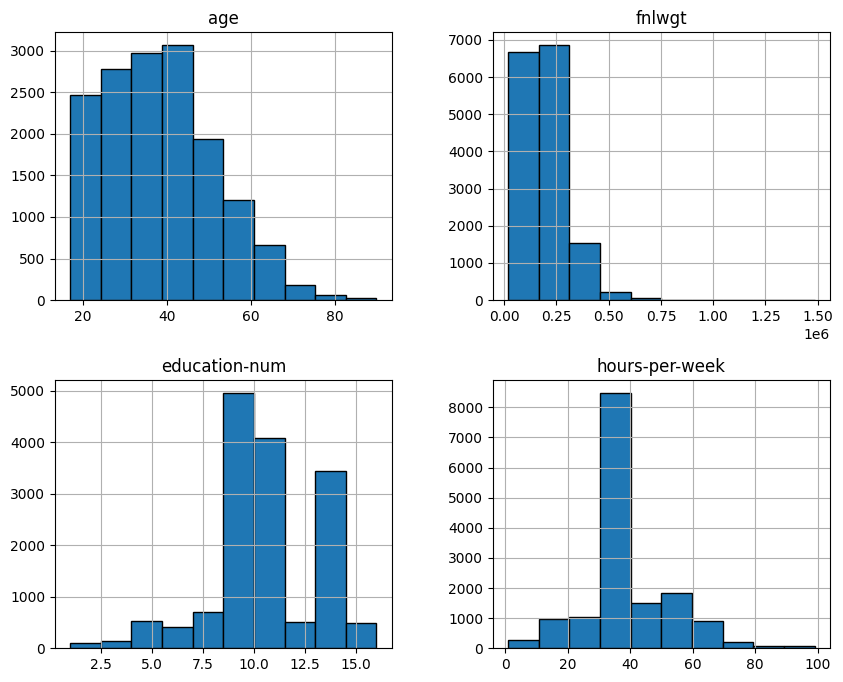

In [64]:
# Гистограммы количественных признаков
num_distr = num[['age','fnlwgt','education-num','hours-per-week']]
num_distr.hist(figsize=(10,8), edgecolor='k',linewidth=1)
plt.show()

'age' - условно непрерывный,
'fnlwgt' - непрерывный,
'education-num' - порядковый,
'hours-per-week' - условно непрерывный.

Регрессионным моделям для корректной работы в качестве входных данных мы должны передавать только количественные признаки. Также для некоторых моделей масштаб признаков должен не сильно различаться, иначе влияние признаков с большими значениями будет весомее.

Чувствительны к масштабу признаков: Все виды регрессии, Метод ближайших соседей, Метод опорных векторов, Нейронная сеть.

Нечувствительны: Дерево решений, Случайный лес, Градиентный бустинг/  Важно нормализовать или стандартизировать данные перед использованием этих алгоритмов для получения точных результатов.

**(1 балл)**
- Масштабируйте данные
- Выделите отдельно X (ваши признаки) и y - ваша колонка таргета

In [65]:
# Сначала выделим признаки и таргет
X = train_col
y = np.array(target)

In [66]:
# Сразу поделим на обучающую и тренировочную выборку
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Масштабируем (только количественные данные)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
Xtrain = scaler.fit_transform(Xtrain.iloc[0:len(train_col), 0:4]) 
Xtest = scaler.transform(Xtest.iloc[0:len(train_col), 0:4])

Далее используйте масштабированные признаки

### 4. Валидация

В нашем случае будем валидироваться с помощью KFold + сохранение баланса классов в каждом "фолде" с помощью StratifiedKFold из sklearn.model_selection

**(1 балл)**

Расскажите:
- Какие виды валидации вы знаете?
- Какие минусы и плюсы каждого подхода к валидации?
- В чем преимущество StratifiedKFold над KFold?

Валидационная выборка нужна для подбора гиперпараметров.
Валидация модели - это промежуточный контроль прогнозов модели посмотреть на данных, не участвовавших в обучении.

Самый простой способ проверки — случайное разбиение на обучающую и тестовую выборки. Из плюсов - легкость разбиения. Из минусов -  используя тестовую выборку и для настройки гиперпараметров и для оценки качества модели можем переобучиться.

Более продвинутый - кросс-валидация. В ней все данные разбиваются на К примерно равных блоков. Затем на К-1 блоках модель обучается, а блок, не участвовавший в обучении, используется для проверки. Имеет много разновидностей. Плюсы: надежная мерика качества модели, вариативность разбияния на блоки. Минусы: некторые стратегии перекрестной проверки очень ресурсоемкие.

В отличии от KFold StratifiedKFold может работать с None и целочисленными значениями. Также, если модель является классификатором и целевая переменная - бинарной или мультиклассовая, также используется StratifiedKfold.


### 5. Выбор алгоритма и оптимизация

При подборе алгоритма будем варьировать не один параметр, а несколько в каждом алгоритме.

Выберем 3 алгоритма:

 - kNN (подробнее [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html))
 - SGD Linear Classifier (подробнее [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html))
 - RandomForest (подробнее [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))
 

### 5.1 kNN

**(3 балла)**
- Инициализируйте дефолтную модель (модель с дефолтными гиперпараметрами).
- Инициализируйте GridSearchCV для подбора гиперпараметров (подробнее [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)). Не забудьте задать параметр cv (число фолдов выберите из диапазона от 3 до 10). 
- Подберите наилучшие параметры для модели с помощью GridSearchCV.
- Постройте график зависимости качества ROC_AUC от параметров (получается 2 графика) с доверительным интервалом. Ось Х - значения параметра, ось Y - значения ROC_AUC.

Подберите оптимальные параметры:
- Число соседей (**n_neighbors**) Перебирайте в диапазоне от 0 до 50.
- Метрика (**metric**) Перебирайте из \['minkowski', 'euclidean', 'chebyshev', 'manhattan'\].

Если подбор занимает очень много времени:
* Задайте значение параметра n_jobs=-1.
* Перебирайте значения из диапазона с шагом 2-5.

Для построения графика зависимости качества модели от показателя metric по оси идут 4 категории метрики. Для построения подобного графика, используйте xticks из pylab. Подробнее [здесь](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html) Потыкайте на картиночки, там откроется код.

Чтобы взять лучшую модель из GridSearchCV используйте метод gsCV.best_estimator_ после того, как обучите GridSearchCV на подбор лучших гиперпараметров.

gsCV.best_estimator_ вернет модель с наилучшими гиперпараметрами с точки зрения качества roc_auc на кросс-валидации.

Чтобы посмотреть параметры лучшей модели, используйте gsCV.best_params_

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [69]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1, 51, 1),
          'metric': ['minkowski', 'euclidean', 'chebyshev', 'manhattan']}
cv = StratifiedKFold(n_splits=3, random_state=50, shuffle=True)
GS_knn = GridSearchCV(estimator=knn, param_grid=params, cv=cv, scoring='roc_auc', n_jobs=-1)
GS_knn.fit(X=Xtrain, y=ytrain)

GS_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 50}

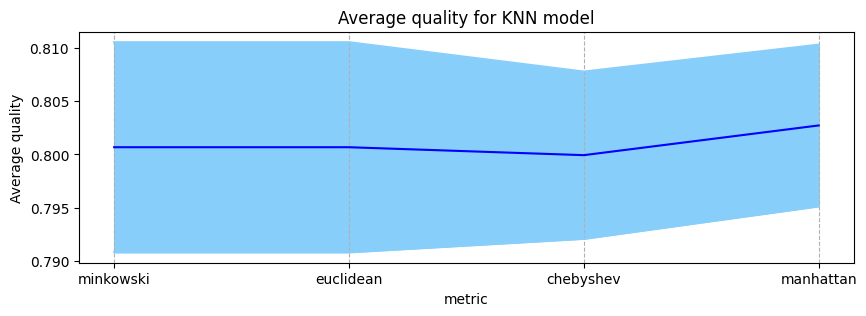

In [70]:
# Metric
params = {'metric': ['minkowski', 'euclidean', 'chebyshev', 'manhattan']}
means = []
for i in range(49,len(GS_knn.cv_results_['mean_test_score']),50):
  means.append(GS_knn.cv_results_['mean_test_score'][i])
stds = []
for i in range(49,len(GS_knn.cv_results_['std_test_score']),50):
  stds.append(GS_knn.cv_results_['std_test_score'][i])
stds = np.array(stds)
error = 1.95 * stds

plt.figure(figsize=(10, 3))
plt.plot(params['metric'], means, color = 'blue')
plt.plot(params['metric'], means - error, color = 'lightskyblue')
plt.plot(params['metric'], means + error, color = 'lightskyblue')
plt.fill_between(params['metric'], means - error, means + error, color = 'lightskyblue')
plt.xlabel('metric')
plt.ylabel('Average quality')
plt.title('Average quality for KNN model')
plt.grid(axis='x', linestyle='--') 
plt.show()

In [71]:
means = np.array(means)
best_met = params['metric'][means.argmax()]
print('Наилучший результат показала метрика -',best_met)

Наилучший результат показала метрика - manhattan


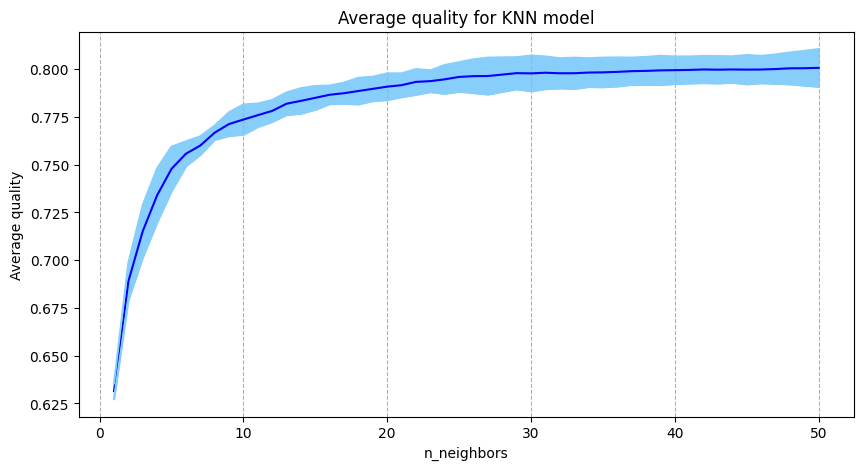

In [72]:
# n_neighbors
params = {'n_neighbors': range(1, 51, 1)}
means = GS_knn.cv_results_['mean_test_score'][0:50]
stds = GS_knn.cv_results_['std_test_score'][0:50]
error = 1.95 * stds
plt.figure(figsize=(10, 5))
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'lightskyblue')
plt.plot(params['n_neighbors'], means + error, color = 'lightskyblue')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'lightskyblue')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for KNN model')
plt.grid(axis='x', linestyle='--') 
plt.show()

In [73]:
means = np.array(means)
n_neig = params['n_neighbors'][means.argmax()]
print('Наилучший результат показало число соседей =',n_neig)

Наилучший результат показало число соседей = 50


### 5.2 SGD Linear Classifier

**(3 балла)**
- Инициализируйте дефолтную модель (модель с дефолтными гиперпараметрами)
- Инициализируйте GridSearchCV для подбора гиперпараметров (подробнее [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)). Не забудьте задать параметр cv (число фолдов выберите из диапазона от 3 до 10). 
- Подберите наилучшие параметры для модели с помощью GridSearchCV.
- Постройте график зависимости качества ROC_AUC от параметров (получается 2 графика) с доверительным интервалом. Ось Х - значения параметра, ось Y - значения ROC_AUC.

Подберите оптимальные параметры:
- Loss функция (**loss**) Перебирайте из \['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive'\]
- Вид штрафа (**penalty**) Перебирайте из \['none', 'l2', 'l1', 'elasticnet'\]


Для построения графика зависимости качества модели от показателей loss, penalty по оси "x" идут категории. Для построения подобного графика, используйте xticks из pylab. Подробнее [здесь](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html) Потыкайте на картиночки, там откроется код.

Чтобы взять лучшую модель из GridSearchCV используйте метод gsCV.best_estimator_ после того, как обучите GridSearchCV на подбор лучших гиперпараметров.

gsCV.best_estimator_ вернет модель с наилучшими гиперпараметрами с точки зрения качества roc_auc на кросс-валидации.

Чтобы посмотреть параметры лучшей модели, используйте gsCV.best_params_

In [74]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [75]:
SGD = SGDClassifier(random_state=50)
params = { 'loss': ['huber', 'modified_huber', 'squared_hinge', 'log',
                    'epsilon_insensitive', 'perceptron', 'hinge', 'squared_error'],
           'penalty': ['l2', 'l1', 'elasticnet', None]}
cv = StratifiedKFold(n_splits=3)
GS_SGD = GridSearchCV(estimator=SGD, param_grid=params, cv=cv, scoring='roc_auc', n_jobs=-1)
GS_SGD.fit(X=Xtrain, y=ytrain)

GS_SGD.best_params_

{'loss': 'log', 'penalty': None}

**Графики зависимости качества ROC_AUC от параметров**

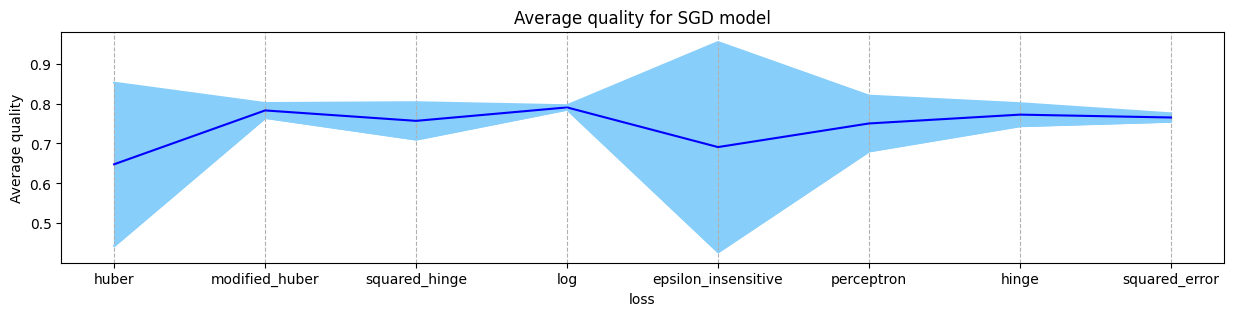

In [76]:
# Loss
means = []
for i in range(2,len(GS_SGD.cv_results_['mean_test_score']),4):
  means.append(GS_SGD.cv_results_['mean_test_score'][i])
stds = []
for i in range(2,len(GS_SGD.cv_results_['std_test_score']),4):
  stds.append(GS_SGD.cv_results_['std_test_score'][i])
stds = np.array(stds)
error = 1.95 * stds

plt.figure(figsize=(15, 3))
plt.plot(params['loss'], means, color = 'blue')
plt.plot(params['loss'], means - error, color = 'lightskyblue')
plt.plot(params['loss'], means + error, color = 'lightskyblue')
plt.fill_between(params['loss'], means - error, means + error, color = 'lightskyblue')
plt.xlabel('loss')
plt.ylabel('Average quality')
plt.title('Average quality for SGD model')
plt.grid(axis='x', linestyle='--') 
plt.show()

In [77]:
means = np.array(means)
best_loss = params['loss'][means.argmax()]
print('Наилучший результат показала loss функция -',best_loss)

Наилучший результат показала loss функция - log


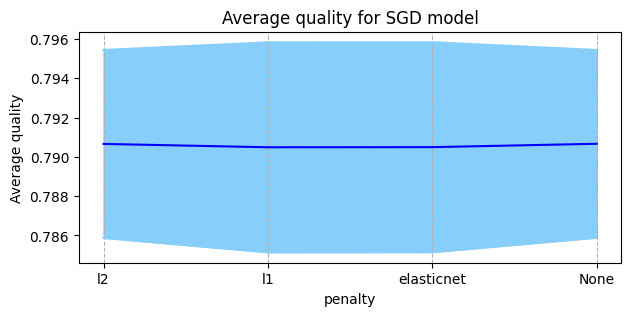

In [78]:
# Penalty
penalties = ['l2', 'l1', 'elasticnet', 'None']
means = GS_SGD.cv_results_['mean_test_score'][12:16]
stds = GS_SGD.cv_results_['std_test_score'][12:16]
error = 1.95 * stds
plt.figure(figsize=(7, 3))
plt.plot(penalties, means, color = 'blue')
plt.plot(penalties, means - error, color = 'lightskyblue')
plt.plot(penalties, means + error, color = 'lightskyblue')
plt.fill_between(penalties, means - error, means + error, color = 'lightskyblue')
plt.xlabel('penalty')
plt.ylabel('Average quality')
plt.title('Average quality for SGD model')
plt.grid(axis='x', linestyle='--') 
plt.show()

In [79]:
means = np.array(means)
best_penalty = penalties[means.argmax()]
print('Наилучший результат показал вид штрафа -',best_penalty)

Наилучший результат показал вид штрафа - None


### 5.3 RandomForestClassifier

**(3 балла)**
- Инициализируйте дефолтную модель (модель с дефолтными гиперпараметрами).
- Инициализируйте GridSearchCV для подбора гиперпараметров (подробнее [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)). Не забудьте задать параметр cv (число фолдов выберите из диапазона от 3 до 10). 
- Подберите наилучшие параметры для модели с помощью GridSearchCV.
- Постройте график зависимости качества ROC_AUC от параметров (получается 2 графика) с доверительным интервалом. Ось Х - значения параметра, ось Y - значения ROC_AUC.

Подберите оптимальные параметры:
- Число деревьев (**n_estimators**) Перебирайте в диапазоне от 0 до 100
- Параметр максимального количества фичей для построения дерева (**max_features**) Перебирайте из \['auto', 'sqrt', 'log2', None\]
- Критерий разбиения на поддеревья (**criterion**) Перебирайте из \['gini', 'entropy'\]


Для построения графика зависимости качества модели от показателей max_features, criterion по оси "x" идут категории. Для построения подобного графика, используйте xticks из pylab. Подробнее [здесь](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html) Потыкайте на картиночки, там откроется код.

Чтобы взять лучшую модель из GridSearchCV используйте метод gsCV.best_estimator_ после того, как обучите GridSearchCV на подбор лучших гиперпараметров.

gsCV.best_estimator_ вернет модель с наилучшими гиперпараметрами с точки зрения качества roc_auc на кросс-валидации.

Чтобы посмотреть параметры лучшей модели, используйте gsCV.best_params_

#### Важно!!!

Число деревьев (**n_estimators**) перебирать с помощью GridSearchCV НЕ НАДО!

Если задание ниже не получится (можете по-старинке перебирать (но придется долго ждать))

**(2 балла)**

Подберём число деревьев (n_estimators) в алгоритме RandomForest, начиная с которого качество стабилизируется. Выполните задание одним из предложенных способов (можете сделать двумя, а потом сравнить их результаты).

_Способ 1_
1. Разбейте выборку на обучающую и тестовую с помощью train_test_split.
2. Для каждого числа деревьев:
  - Обучите модель на обучающей выборке
  - Посчитайте скор на тестовой выборке
  - Сохраните скор
3. Проанализируйте зависимость качества предсказания модели от числа деревьев (постройте график).
4. Напишите какое оптимальное количество деревьев следует использовать и почему.

_Способ 2_
1. Для каждого числа деревьев:
  - Посчитайте скор, используя cross_val_score
  - Сохраните скор
3. Проанализируйте зависимость качества предсказания модели от числа деревьев (постройте график).
4. Напишите какое оптимальное количество деревьев следует использовать и почему.

В дальнейших экспериментах используйте подобранное количество деревьев.

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


#### Сначала подберите оптимальное количество деревьев, зафиксируйте, затем другие параметры.

In [81]:
# Используем 1ый способ (данные разделили выше)
max_trees_number = 100
result = []

for current_trees_number in range(1,max_trees_number,1):
    RFC_model = RandomForestClassifier(n_estimators=current_trees_number,random_state=50)
    RFC_model.fit(X=Xtrain, y=ytrain)
    y_pred = RFC_model.predict(Xtest)
    result.append(roc_auc_score(ytest, y_pred))

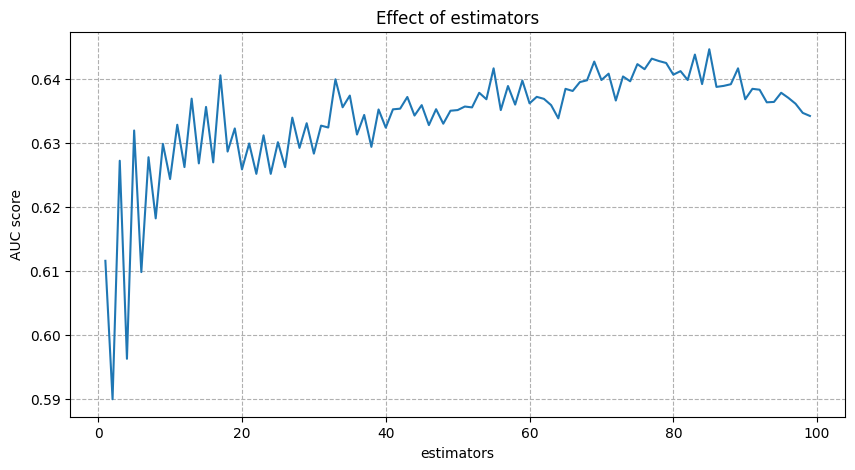

In [82]:
plt.figure(figsize=(10, 5))
plt.title("Effect of estimators")
plt.xlabel("estimators")
plt.ylabel("AUC score")
x = np.arange(1,max_trees_number,1)
plt.plot(x, result) 
plt.grid(True,linestyle='--')
plt.show()

In [83]:
result = np.array(result)
n_trees = result.argmax()+1
print('Наилучший AUC score для кол-ва деревьев =',n_trees)

Наилучший AUC score для кол-ва деревьев = 85


**Обучаем модель**

In [84]:
rfc = RandomForestClassifier(n_estimators=n_trees, random_state=50)
params = {'criterion': ['gini', 'entropy'],
          'max_features':  ['auto', 'sqrt', 'log2', None]}
cv = StratifiedKFold(n_splits=3) # Не тасую данные, т.к. при проверке на тестовой выборке результат модели с перетасовкой был хуже, чем без него 
GS_rfc = GridSearchCV(estimator=rfc, param_grid=params, cv=cv, scoring='roc_auc', n_jobs=-1)
GS_rfc.fit(X=Xtrain, y=ytrain)

GS_rfc.best_params_

{'criterion': 'entropy', 'max_features': None}

**Графики зависимости качества ROC_AUC от параметров**

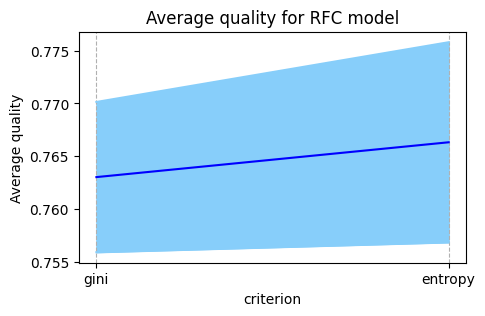

In [85]:
# Criterion
params = {'criterion': ['gini', 'entropy']}
means = []
for i in range(3,len(GS_rfc.cv_results_['mean_test_score']),4):
  means.append(GS_rfc.cv_results_['mean_test_score'][i])
stds = []
for i in range(3,len(GS_rfc.cv_results_['std_test_score']),4):
  stds.append(GS_rfc.cv_results_['std_test_score'][i])
stds = np.array(stds)
error = 1.95 * stds

plt.figure(figsize=(5, 3))
plt.plot(params['criterion'], means, color = 'blue')
plt.plot(params['criterion'], means - error, color = 'lightskyblue')
plt.plot(params['criterion'], means + error, color = 'lightskyblue')
plt.fill_between(params['criterion'], means - error, means + error, color = 'lightskyblue')
plt.xlabel('criterion')
plt.ylabel('Average quality')
plt.title('Average quality for RFC model')
plt.grid(axis='x', linestyle='--') 
plt.show()

In [86]:
means = np.array(means)
best_crit = params['criterion'][means.argmax()]
print('Наилучший результат показал критерий разбиения на поддеревья -',best_crit)

Наилучший результат показал критерий разбиения на поддеревья - entropy


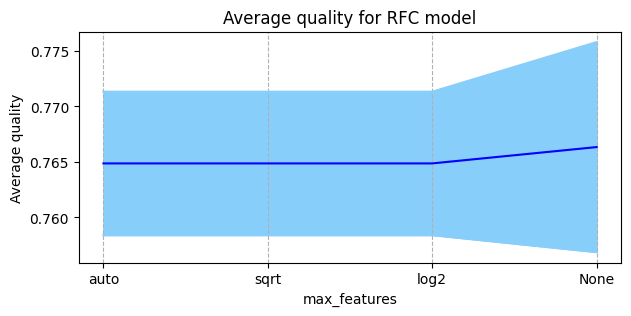

In [87]:
# Max_features
features = ['auto', 'sqrt', 'log2', 'None']
means = GS_rfc.cv_results_['mean_test_score'][4:8]
stds = GS_rfc.cv_results_['std_test_score'][4:8]
error = 1.95 * stds
plt.figure(figsize=(7, 3))
plt.plot(features, means, color = 'blue')
plt.plot(features, means - error, color = 'lightskyblue')
plt.plot(features, means + error, color = 'lightskyblue')
plt.fill_between(features, means - error, means + error, color = 'lightskyblue')
plt.xlabel('max_features')
plt.ylabel('Average quality')
plt.title('Average quality for RFC model')
plt.grid(axis='x', linestyle='--') 
plt.show()

In [88]:
means = np.array(means)
best_feat = features[means.argmax()]
print('Наилучший результат показал параметр фичей -',best_feat)

Наилучший результат показал параметр фичей - None


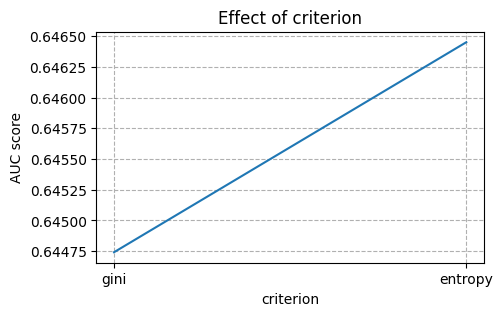

In [89]:
# Доп. проверка на тестовых данных
# Criterion
criterions = ['gini', 'entropy']
result = []

for criterion in criterions:
  RFC_model = RandomForestClassifier(criterion=criterion,max_features=None,n_estimators=n_trees, random_state=50)
  RFC_model.fit(X=Xtrain, y=ytrain)
  y_pred = RFC_model.predict(Xtest)
  result.append(roc_auc_score(ytest, y_pred))

plt.figure(figsize=(5, 3))
plt.title("Effect of criterion")
plt.xlabel("criterion")
plt.ylabel("AUC score")
x = np.arange(2)
plt.xticks(x, ('gini', 'entropy'))
plt.plot(x, result) 
plt.grid(True,linestyle='--')
plt.show()

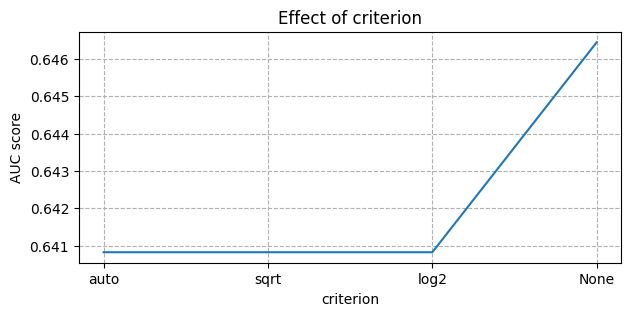

In [90]:
# Max_features
features = ['auto', 'sqrt', 'log2', None]
result = []

for feature in features:
  RFC_model = RandomForestClassifier(criterion='entropy',max_features=feature,n_estimators=n_trees, random_state=50)
  RFC_model.fit(X=Xtrain, y=ytrain)
  y_pred = RFC_model.predict(Xtest)
  result.append(roc_auc_score(ytest, y_pred))

plt.figure(figsize=(7, 3))
plt.title("Effect of criterion")
plt.xlabel("criterion")
plt.ylabel("AUC score")
x = np.arange(4)
plt.xticks(x, ('auto', 'sqrt', 'log2', 'None'))
plt.plot(x, result) 
plt.grid(True,linestyle='--')
plt.show()

### 6. Ансамбль моделей

**(2 балла)**

Попробуйте "заблендить" модели (сложить результаты (ответы) разных алгоритмов) с разными коэффициентами перед ними.

Попробуйте различные комбинации алгоритмов. А так же все три алгоритма вместе.

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

Подробнее про ансамбли: [здесь](https://dyakonov.org/2017/03/10/cтекинг-stacking-и-блендинг-blending/)

Простой пример использования VotingClassifier и его описание можно найти в официальной документации: [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) 


In [91]:
# Библиотека для блендинга
from sklearn.ensemble import VotingClassifier

In [92]:
clf_knn = KNeighborsClassifier(n_neighbors=50, metric='manhattan')
clf_sgd = SGDClassifier(loss='log', penalty=None, random_state=50)
clf_rfc = RandomForestClassifier(criterion='entropy', max_features=None, n_estimators=n_trees, random_state=50)

clf_knn = clf_knn.fit(Xtrain, ytrain)
clf_sgd = clf_sgd.fit(Xtrain, ytrain)
clf_rfc = clf_rfc.fit(Xtrain, ytrain)

In [222]:
blend = VotingClassifier(estimators=[('knn', clf_knn), ('sgd', clf_sgd), ('rfc', clf_rfc)],
                         voting='soft', weights=[0.4, 0.15, 0.35]) # Мягкое голосование показало результат лучше, чем жесткое
blend = blend.fit(Xtrain, ytrain)

print('roc_auc_score of KNN:', roc_auc_score(ytest, clf_knn.predict(Xtest)))
print('roc_auc_score of SGD:', roc_auc_score(ytest, clf_sgd.predict(Xtest)))
print('roc_auc_score of RFC:', roc_auc_score(ytest, clf_rfc.predict(Xtest)))
print('roc_auc_score of Ensemble Models:', roc_auc_score(ytest, blend.predict(Xtest)))

roc_auc_score of KNN: 0.6456353079058658
roc_auc_score of SGD: 0.6459622866004465
roc_auc_score of RFC: 0.6464513620584394
roc_auc_score of Ensemble Models: 0.6578504966511143


Найдем наилучшие веса.

In [238]:
res = pd.DataFrame(columns = ('Weights', 'ROC_AUC_score'))

for i in range(1,9,2):
  for j in range(1,10-i,2):
      blend3 = VotingClassifier(estimators=[('knn', clf_knn), ('sgd', clf_sgd), ('rfc', clf_rfc)],
                          voting='soft', weights=[i/10, j/10, round(1-((i/10)+(j/10)),1)])
      blend3 = blend3.fit(X=Xtrain, y=ytrain)
      y_pred = blend3.predict(Xtest)
      new_row = {'Weights': (i/10, j/10, round(1-((i/10)+(j/10)),1)), 'ROC_AUC_score': roc_auc_score(ytest, y_pred)}
      res = res.append(new_row, ignore_index=True)
res

,Weights,ROC_AUC_score
0,"(0.1, 0.1, 0.8)",0.652643
1,"(0.1, 0.3, 0.6)",0.662473
2,"(0.1, 0.5, 0.4)",0.664390
3,"(0.1, 0.7, 0.2)",0.658767
4,"(0.3, 0.1, 0.6)",0.657822
5,"(0.3, 0.3, 0.4)",0.664014
6,"(0.3, 0.5, 0.2)",0.662605
7,"(0.5, 0.1, 0.4)",0.655744
8,"(0.5, 0.3, 0.2)",0.660081
9,"(0.7, 0.1, 0.2)",0.658652


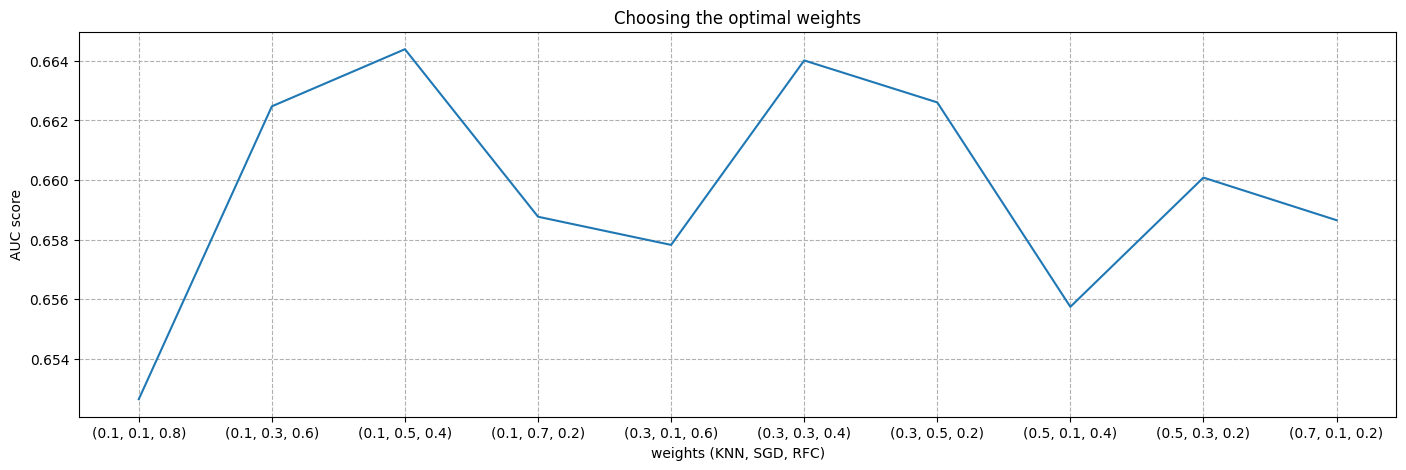

In [100]:
plt.figure(figsize=(17, 5))
plt.title("Choosing the optimal weights")
plt.xlabel("weights (KNN, SGD, RFC)")
plt.ylabel("AUC score")
x = np.arange(10)
plt.xticks(x, res['Weights'])
plt.plot(x, res['ROC_AUC_score']) 
plt.grid(True,linestyle='--')
plt.show()

In [240]:
res = np.array(res)
res1 = res[res[:,1].argmax()]
print('Наилучший результат показали веса (KNN, SGD, RFC):', res1[0])

Наилучший результат показали веса (KNN, SGD, RFC): (0.1, 0.5, 0.4)


### 7. Ящик с усами

**(2 балла)**

Давайте посмотрим визуально на качество наших моделей. Вы уже знаете, какие гиперпараметры для наших моделей являются наилучшими. Зафиксируйте данные параметры:

In [243]:
best_model_knn = clf_knn 
best_model_random_forest = clf_rfc
best_model_sgd = clf_sgd
best_model_voting_classifier = VotingClassifier(estimators=[('knn', clf_knn), ('sgd', clf_sgd), ('rfc', clf_rfc)],
                          voting='soft', weights=[0.1, 0.5, 0.4])
best_model_voting_classifier = best_model_voting_classifier.fit(Xtrain, ytrain)

Посмотрим на наше качество на кросс_валидации:

In [242]:
from sklearn.model_selection import cross_val_score

In [252]:
# В качестве cv возьмите StratifiedKFold с 7 фолдами
cv = StratifiedKFold(n_splits=7)

cv_score_knn = cross_val_score(estimator=best_model_knn, X=Xtrain, y=ytrain, cv=cv, scoring='roc_auc')
cv_score_random_forest = cross_val_score(estimator=best_model_random_forest, X=Xtrain, y=ytrain, cv=cv, scoring='roc_auc')
cv_score_sgd = cross_val_score(estimator=best_model_sgd, X=Xtrain, y=ytrain, cv=cv, scoring='roc_auc')
cv_score_voting_classifier = cross_val_score(estimator=best_model_voting_classifier, X=Xtrain, y=ytrain, cv=cv, scoring='roc_auc')

Создайте таблицу pandas.DataFrame с колонками названиями методов (4 колонки), а значения - выход функции cross_val_score

In [256]:
final_result = pd.DataFrame({'KNN':cv_score_knn, 'SGD':cv_score_sgd, 'RFC':cv_score_random_forest, 'VC':cv_score_voting_classifier})
final_result

,KNN,SGD,RFC,VC
0,0.809066,0.798938,0.759354,0.796989
1,0.798363,0.777019,0.766524,0.789248
2,0.806183,0.796707,0.772804,0.801097
3,0.803427,0.792041,0.777848,0.802393
4,0.806787,0.783832,0.760205,0.790106
5,0.813647,0.803791,0.770295,0.807233
6,0.805052,0.785792,0.759597,0.791331


Запустите код ниже

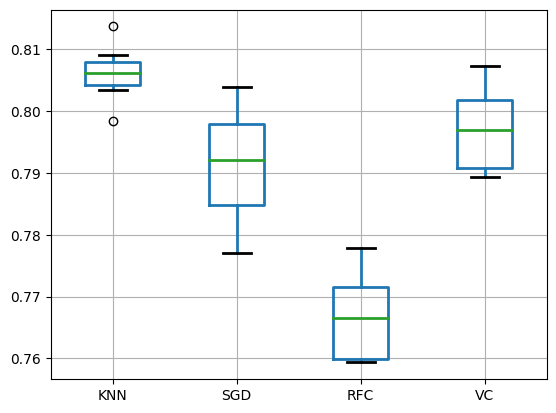

In [255]:
ax = final_result.boxplot() 
_ = plt.setp(ax.lines, linewidth=2.0)
plt.show()

### 8. Выводы

**(1 балл)**
По графику выше сделайте вывод:
- Какой алгоритм "победил в соревновании" за качество?
- Лучший алгоритм с точки зрения качества/скорости работы (иногда это очень важно)
- Опишите каждый алгоритм (вкратце), его плюсы и минусы

По результатам кросс-валидации очевидным победителем стал Метод k-ближайших соседей. 

In [270]:
import time

def timedef(model):
  start_time = time.time()
  model.predict(Xtest)
  end_time = time.time()
  running_time = end_time - start_time
  print("Speed:", running_time, "seconds.")

print('KNN'); timedef(best_model_knn)
print('SGD'); timedef(best_model_sgd)
print('RFC'); timedef(best_model_random_forest)
print('VC'); timedef(best_model_voting_classifier)

KNN
Speed: 0.6673433780670166 seconds.
SGD
Speed: 0.008418083190917969 seconds.
RFC
Speed: 0.24041032791137695 seconds.
VC
Speed: 0.7867228984832764 seconds.


Лучший алгоритм с точки зрения скорости - SGD Linear Classifier.

In [260]:
print('KNN ROC_AUC_score:', roc_auc_score(ytest, best_model_knn.predict(Xtest)))
print('SGD ROC_AUC_score:', roc_auc_score(ytest, best_model_sgd.predict(Xtest)))
print('RFC ROC_AUC_score:', roc_auc_score(ytest, best_model_random_forest.predict(Xtest)))
print('VC  ROC_AUC_score:', roc_auc_score(ytest, best_model_voting_classifier.predict(Xtest)))

KNN ROC_AUC_score: 0.6456353079058658
SGD ROC_AUC_score: 0.6459622866004465
RFC ROC_AUC_score: 0.6464513620584394
VC  ROC_AUC_score: 0.6643895135091775


C точки зрения качества прогноза на тестовых данных - ансамбль моделей.